# What is a Pixel and what is an Image?

Images are everywhere. Have you ever wondered how exactly are images stored/read by a computer?

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

def plot_digit_image_and_values(image, label):
    """
    Plots a grayscale digit image on the left,
    and a table of pixel values on the right.
    """
    # Format pixel values as strings with 2 digits
    pixel_text = np.vectorize(lambda x: f"{int(x):02d}")(image)

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Plot the image on the left
    axes[0].imshow(image, cmap='gray', interpolation='nearest')
    axes[0].set_title(f'Digit Image (Label: {label})')
    axes[0].axis('off')

    # Plot the pixel values on the right as a square table
    axes[1].axis('off')
    table = axes[1].table(
        cellText=pixel_text,
        loc='center',
        cellLoc='center'
    )
    table.scale(1, 1.5)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

Type of image: <class 'numpy.ndarray'>
Shape of image: (8, 8)


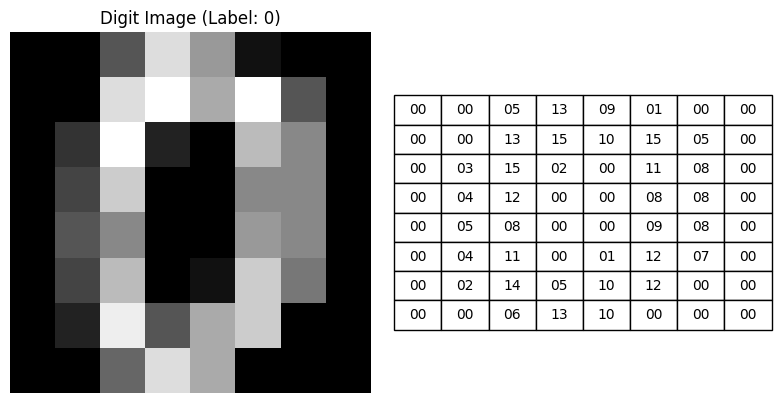

In [17]:
# Load the digits dataset
digits = load_digits()

# Choose which image to visualize
index = 0
image = digits.images[index]

print("Type of image:", type(image))
print("Shape of image:", image.shape)

label = digits.target[index]

# Plot using the utility function
plot_digit_image_and_values(image, label)

We see that images are stored as `numpy-arrays`.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook
from PIL import Image

def plot_image(image, title='Image'):
    """
    Plots a given image using matplotlib with no axes and a title.
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(title)
    plt.tight_layout()
    plt.show()

Type of PIL image: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Type of image: <class 'numpy.ndarray'>
Shape of image: (600, 512, 3)


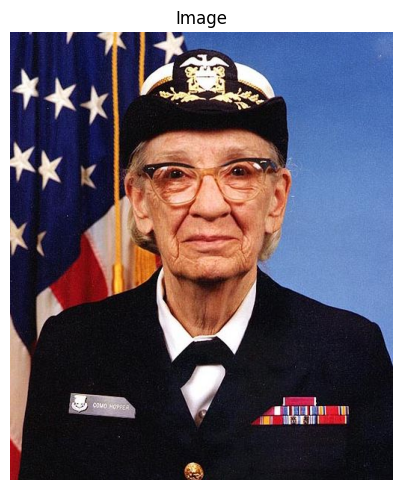

In [24]:
with cbook.get_sample_data('grace_hopper.jpg') as image_file:
    pil_image = Image.open(image_file)
    print("Type of PIL image:", type(pil_image))
    image = np.array(pil_image)

print("Type of image:", type(image))
print("Shape of image:", image.shape)

plot_image(image, title='Image')

Now that we know images can be created as simple numpy arrays, can `create` our own images? Let's try it out.

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_grayscale_image(image, title='Grayscale Image'):
    """
    Plots a grayscale image (2D NumPy array) using matplotlib.
    """
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

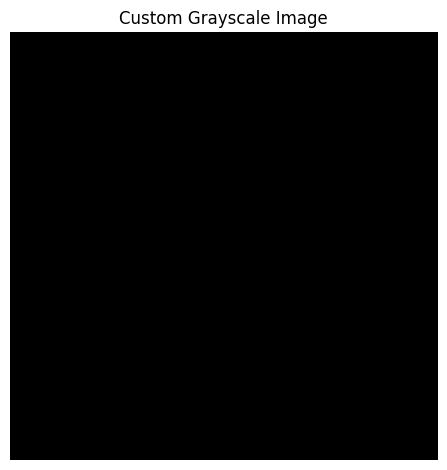

In [22]:
size = 64
image = np.zeros((size, size), dtype=np.uint8)

# Plot the image
plot_grayscale_image(image, title="Custom Grayscale Image")

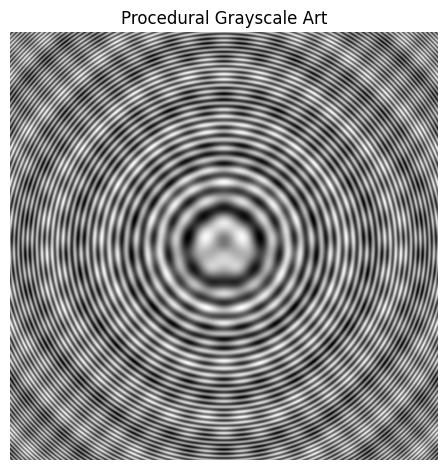

In [25]:
# Create a 1024x1024 image
size = 1024
x = np.linspace(-4 * np.pi, 4 * np.pi, size)
y = np.linspace(-4 * np.pi, 4 * np.pi, size)
X, Y = np.meshgrid(x, y)

# Complex pattern using sine, cosine, radial symmetry, and decay
Z = (
    np.sin(X**2 + Y**2) +
    0.5 * np.cos(3 * X) * np.sin(3 * Y) +
    0.3 * np.sin(np.sqrt(X**2 + Y**2) * 2)
)

# Normalize to [0, 255]
Z_normalized = 255 * (Z - Z.min()) / (Z.max() - Z.min())
image = Z_normalized.astype(np.uint8)

# Plot the result
plot_grayscale_image(image, title='Procedural Grayscale Art')

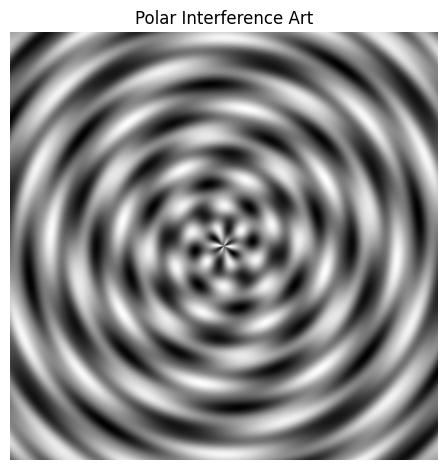

In [26]:
# Create a 1024x1024 image
size = 1024
x = np.linspace(-2, 2, size)
y = np.linspace(-2, 2, size)
X, Y = np.meshgrid(x, y)

# Convert to polar coordinates
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

# Generate complex interference pattern with swirl + decay
Z = (
    np.sin(20 * R + 4 * Theta) +
    np.cos(8 * R - 6 * Theta) +
    0.2 * np.sin(40 * R)
)

# Normalize to [0, 255]
Z_normalized = 255 * (Z - Z.min()) / (Z.max() - Z.min())
image = Z_normalized.astype(np.uint8)

# Plot the result
plot_grayscale_image(image, title='Polar Interference Art')

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def plot_rgb_image(image, title='Generated RGB Art'):
    """
    Plots an RGB image (3D NumPy array with shape H×W×3) using matplotlib.
    """
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

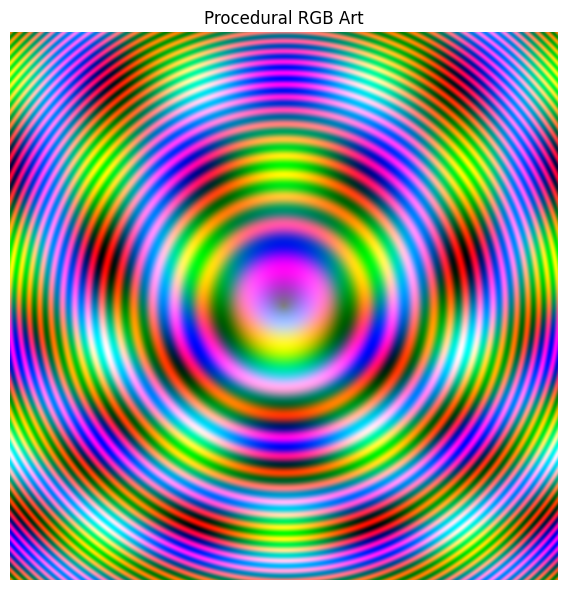

In [ ]:
# Set image size
size = 1024
x = np.linspace(-3 * np.pi, 3 * np.pi, size)
y = np.linspace(-3 * np.pi, 3 * np.pi, size)
X, Y = np.meshgrid(x, y)

# Generate R, G, B channels using different complex patterns
R = np.sin(X**2 + Y**2)
G = np.cos(X) * np.sin(Y)
B = np.sin(2 * np.sqrt(X**2 + Y**2) + Y)

# Normalize each channel to [0, 255]
def normalize(channel):
    return ((channel - channel.min()) / (channel.max() - channel.min()) * 255).astype(np.uint8)

R_norm = normalize(R)
G_norm = normalize(G)
B_norm = normalize(B)

# Stack into RGB image
rgb_image = np.stack([R_norm, G_norm, B_norm], axis=-1)

# Plot the image
plot_rgb_image(rgb_image, titledo ='Procedural RGB Art')